In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns',None)

In [2]:
age_train = pd.read_csv("age_train.csv", names=['uid','age_group'])
age_test = pd.read_csv("age_test.csv", names=['uid'])
user_basic_info = pd.read_csv("user_basic_info.csv", names=['uid','gender','city','prodName','ramCapacity','ramLeftRation','romCapacity','romLeftRation','color','fontSize','ct','carrier','os'])
user_behavior_info = pd.read_csv("user_behavior_info.csv", names=['uid','bootTimes','AFuncTimes','BFuncTimes','CFuncTimes','DFuncTimes','EFuncTimes','FFuncTimes','FFuncSum'])
user_app_actived = pd.read_csv("user_app_actived.csv", names=['uid','appId'])
app_info = pd.read_csv("app_info.csv", names=['appId', 'category'])

In [24]:
class2id = {}
id2class = {}

def mergeBasicTables(baseTable):
    
    resTable = baseTable.merge(user_basic_info, how='left', on='uid', suffixes=('_base0', '_ubaf'))
    resTable = resTable.merge(user_behavior_info, how='left', on='uid', suffixes=('_base1', '_ubef'))
    
    cat_columns = ['city','prodName','color','carrier','os','ct']
    for c in cat_columns:
        resTable[c] = resTable[c].apply(lambda x: x if type(x)==str else str(x))
        
        sort_temp = sorted(list(set(resTable[c])))  
        class2id[c+'2id'] = dict(zip(sort_temp, range(1, len(sort_temp)+1)))
        id2class['id2'+c] = dict(zip(range(1,len(sort_temp)+1), sort_temp))
        resTable[c] = resTable[c].apply(lambda x: class2id[c+'2id'][x])
        
    return resTable

In [25]:
train_basic = mergeBasicTables(age_train)
test_basic = mergeBasicTables(age_test)

## age_train

Text(0,0.5,'people')

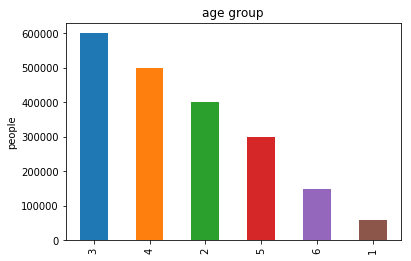

In [65]:
train_basic.age_group.value_counts().plot(kind='bar')
plt.title('age group')
plt.ylabel('people')

## user_basic_info

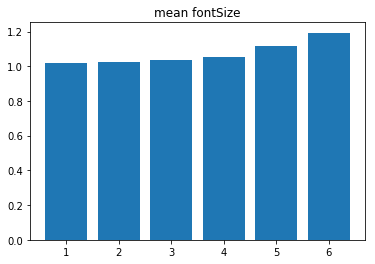

In [134]:
def plot_fn_0(x):
    y = []
    for i in range(1, 7):
        y.append(train_basic[train_basic['age_group'] == i][x].mean())
    plt.bar(range(1, 7), y)
    plt.title('mean '+ x)

plot_fn_0('fontSize')

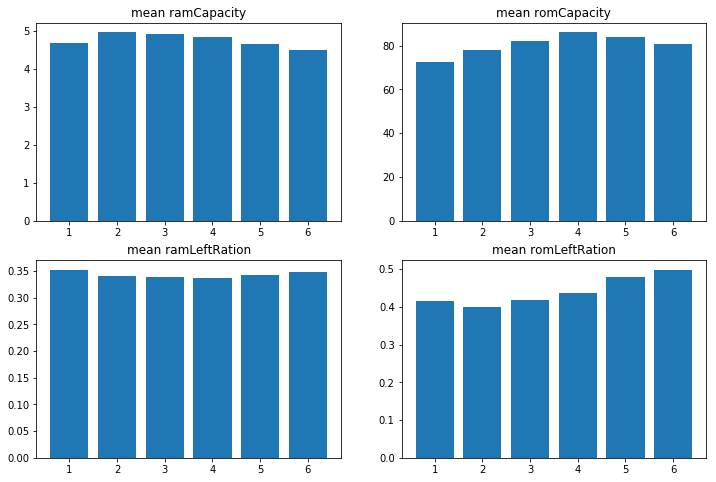

In [136]:
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.xticks([1, 2, 3, 4, 5, 6])
plot_fn_0('ramCapacity')

plt.subplot(222)
plt.xticks([1, 2, 3, 4, 5, 6])
plot_fn_0('romCapacity')

plt.subplot(223)
plt.xticks([1, 2, 3, 4, 5, 6])    
plot_fn_0('ramLeftRation')

plt.subplot(224)
plt.xticks([1, 2, 3, 4, 5, 6])  
plot_fn_0('romLeftRation')

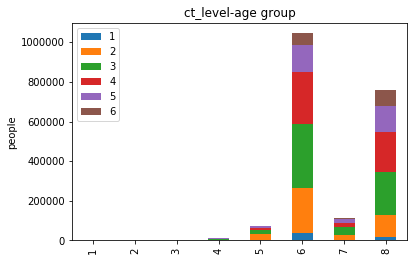

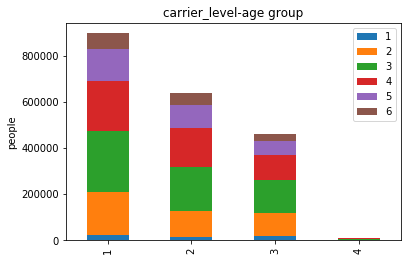

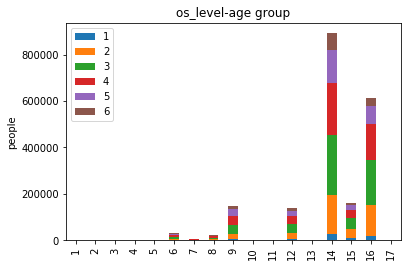

In [126]:
def plot_fn_1(x):

    age_group_1 = train_basic[x][train_basic['age_group'] == 1].value_counts()
    age_group_2 = train_basic[x][train_basic['age_group'] == 2].value_counts()
    age_group_3 = train_basic[x][train_basic['age_group'] == 3].value_counts()
    age_group_4 = train_basic[x][train_basic['age_group'] == 4].value_counts()
    age_group_5 = train_basic[x][train_basic['age_group'] == 5].value_counts()
    age_group_6 = train_basic[x][train_basic['age_group'] == 6].value_counts()

    df = pd.DataFrame({'1': age_group_1, '2': age_group_2, '3': age_group_3, '4': age_group_4, '5': age_group_5, '6': age_group_6})
    df.plot(kind='bar', stacked=True)
    plt.title(x + '_level-age group')
    plt.ylabel('people')

plot_fn_1('ct')
plot_fn_1('carrier')
plot_fn_1('os')

## user_behaviour_info

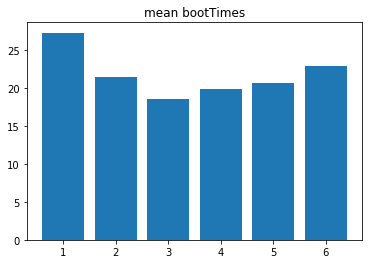

In [138]:
plot_fn_0('bootTimes')

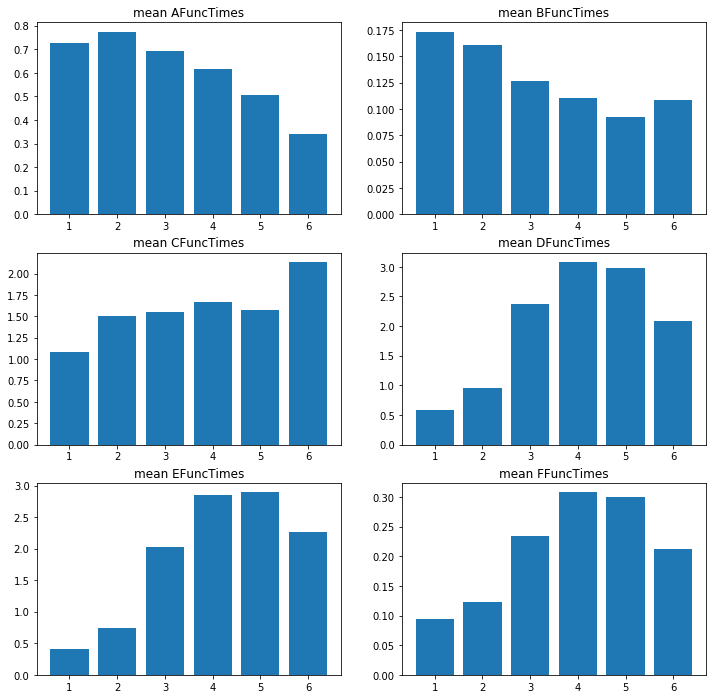

In [154]:
plt.figure(figsize=(12, 12))

plt.subplot(321)
plt.xticks([1, 2, 3, 4, 5, 6])
plot_fn_0('AFuncTimes')

plt.subplot(322)
plt.xticks([1, 2, 3, 4, 5, 6])
plot_fn_0('BFuncTimes')

plt.subplot(323)
plt.xticks([1, 2, 3, 4, 5, 6])
plot_fn_0('CFuncTimes')

plt.subplot(324)
plt.xticks([1, 2, 3, 4, 5, 6])
plot_fn_0('DFuncTimes')

plt.subplot(325)
plt.xticks([1, 2, 3, 4, 5, 6])
plot_fn_0('EFuncTimes')

plt.subplot(326)
plt.xticks([1, 2, 3, 4, 5, 6])
plot_fn_0('FFuncTimes')

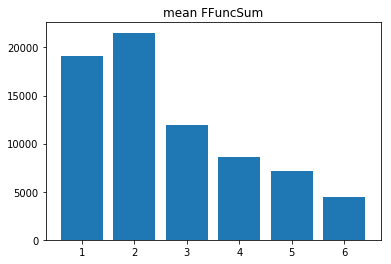

In [155]:
plot_fn_0('FFuncSum')

---

In [156]:
train_app_info = pd.read_csv('./data/train_app_info.csv')
test_app_info = pd.read_csv('./data/test_app_info.csv')

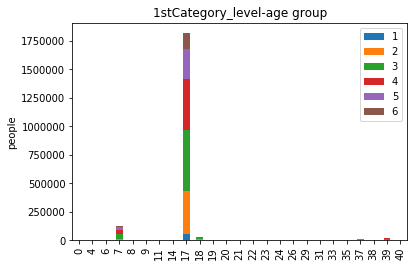

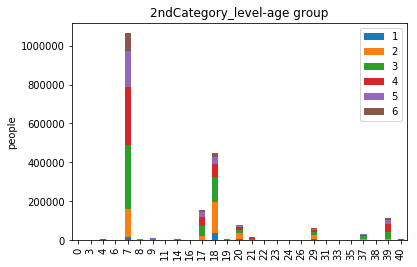

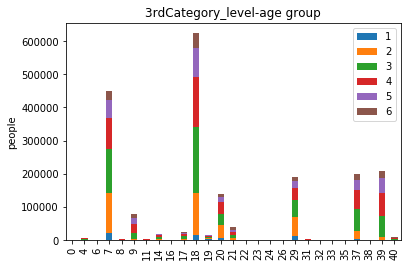

In [159]:
def plot_fn_2(x):

    age_group_1 = train_app_info[x][train_basic['age_group'] == 1].value_counts()
    age_group_2 = train_app_info[x][train_basic['age_group'] == 2].value_counts()
    age_group_3 = train_app_info[x][train_basic['age_group'] == 3].value_counts()
    age_group_4 = train_app_info[x][train_basic['age_group'] == 4].value_counts()
    age_group_5 = train_app_info[x][train_basic['age_group'] == 5].value_counts()
    age_group_6 = train_app_info[x][train_basic['age_group'] == 6].value_counts()

    df = pd.DataFrame({'1': age_group_1, '2': age_group_2, '3': age_group_3, '4': age_group_4, '5': age_group_5, '6': age_group_6})
    df.plot(kind='bar', stacked=True)
    plt.title(x + '_level-age group')
    plt.ylabel('people')
    
plot_fn_2('1stCategory')
plot_fn_2('2ndCategory')
plot_fn_2('3rdCategory')

In [160]:
train_basic_info.columns

Index(['uid', 'age_group', 'gender', 'city', 'prodName', 'ramCapacity',
       'ramLeftRation', 'romCapacity', 'romLeftRation', 'color', 'fontSize',
       'ct', 'carrier', 'os', 'bootTimes', 'AFuncTimes', 'BFuncTimes',
       'CFuncTimes', 'DFuncTimes', 'EFuncTimes', 'FFuncTimes', 'FFuncSum'],
      dtype='object')